# Lesson 14 - K-Nearest Neighbors

### The following topics are discussed in this notebook:
* K-Nearest Neighbors Algorithm


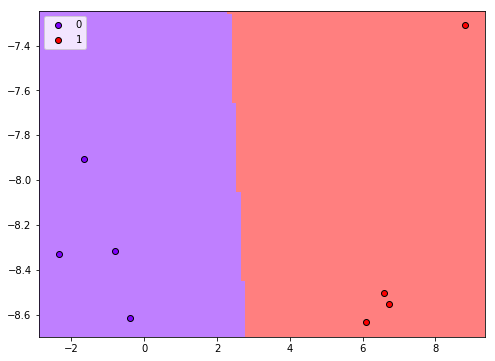

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import MLUtilities as mlu
import ipywidgets as widgets

## K-Nearest Neighbors Algorithm

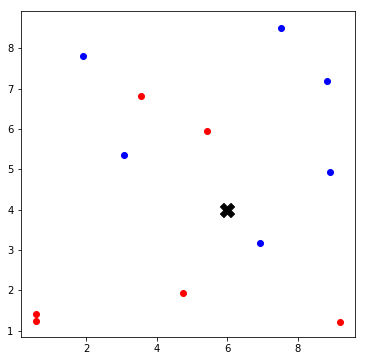

In [2]:
np.random.seed(391)

X = np.random.uniform(0,10,24).reshape(12,2)
y = np.array(['red']*6 + ['blue']*6)

plt.close()
plt.rcParams["figure.figsize"] = [6,6]
plt.scatter(X[:6,0],X[:6,1], c='r')
plt.scatter(X[6:,0],X[6:,1], c='b')
plt.scatter([6],[4], c='k', marker='X', s=200)
plt.show()

### Preliminary: The argsort Function

In [3]:
my_array = [7.8, 5.7, 4.8, 1.3, 6.4]
print(np.sort(my_array))
print(np.argsort(my_array))

[ 1.3  4.8  5.7  6.4  7.8]
[3 2 1 4 0]


## Classifiying a Single Point

In [4]:
#predict method in class

P=np.array([6,4])
K=4

n= len(y)

sq_distances = (P[0]-X[:,0])**2+(P[1]-X[:,1])**2 #find the distances between all points in array and point P

idx = np.argsort(sq_distances)[:K] # find the indices of the smallest distances

y_knn=y[idx] #find the labels for the above indices
d_knn = sq_distances[idx]

n_blue = np.sum(y_knn=='blue') #the number of blue votes
n_red = np.sum(y_knn=='red') #the number of red votes

dist_blue = np.sum(d_knn[y_knn=='blue']) #total distance of blue points
dist_red = np.sum(d_knn[y_knn=='red']) #total distance of red points


if(n_red>n_blue):
    print('The predicted class for the point', P, 'is "red".')
elif(n_blue>n_red):
    print('The predicted class for the point', P, 'is "blue".')
elif(dist_blue<dist_red):
    print('The predicted class for the point', P, 'is "blue".')
else:
    print('The predicted class for the point', P, 'is "red".')



The predicted class for the point [6 4] is "red".


## KNN in Scikit-Learn

In [5]:
from sklearn.neighbors import KNeighborsClassifier

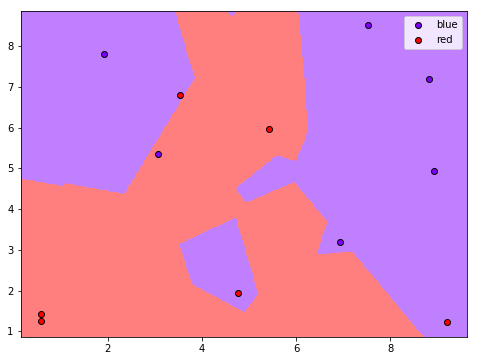

In [6]:
mod = KNeighborsClassifier(n_neighbors=3) #create model of classifier
mod.fit(X,y) #constructor simply stores X and y into the class

mlu.plot_regions(mod, X, y, num_ticks=500)

## The Effect of Changing K

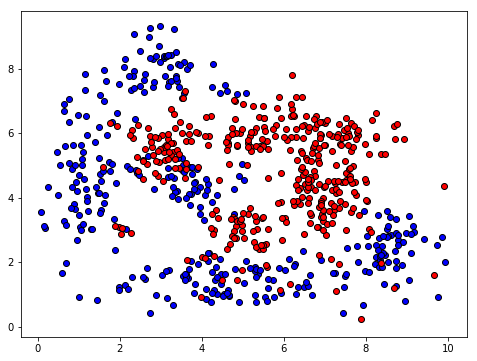

In [7]:
df = pd.read_table(filepath_or_buffer='Datasets\knn_example.txt', sep='\t')

X = np.array(df.iloc[:,:2])
y = np.array(df.iloc[:,2]).astype(int)

plt.close()
plt.rcParams["figure.figsize"] = [8,6]
plt.scatter(X[y==0,0],X[y==0,1], c='b', edgecolor='k')
plt.scatter(X[y==1,0],X[y==1,1], c='r', edgecolor='k')
plt.show()


In [8]:
def knn_example(K):
    mod = KNeighborsClassifier(K)
    mod.fit(X,y)
    mlu.plot_regions(mod, X, y)

_ = widgets.interact(knn_example,
                     K=widgets.IntSlider(min=1,max=400,step=1,value=1,continuous_update=False))

A Jupyter Widget

## Testing vs Training Accuracy in KNN

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

print("Training Accuracy:", knn.score(X_train,y_train))
print("Testing Accuracy:", knn.score(X_test,y_test))

Training Accuracy: 0.952674897119
Testing Accuracy: 0.851674641148


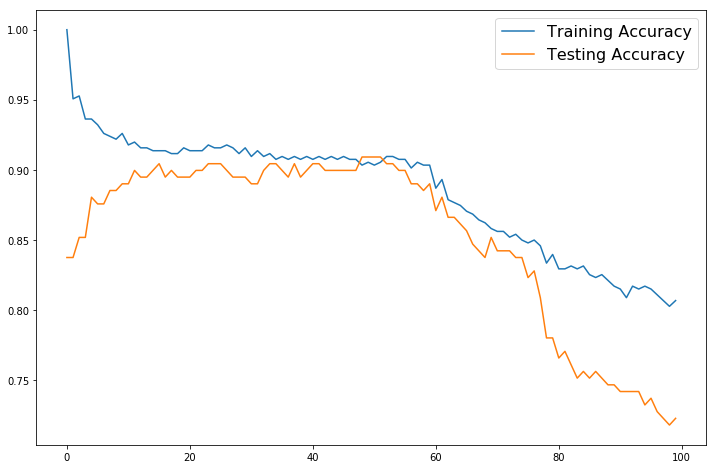

In [11]:
train_acc = []
test_acc = []

for K in range(1,101):
    
    knn = KNeighborsClassifier(K)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))
    
plt.close()
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(train_acc, label="Training Accuracy")
plt.plot(test_acc, label="Testing Accuracy")
plt.legend(fontsize=16)
plt.show()

## Comparison between KNN and Logistic Regression

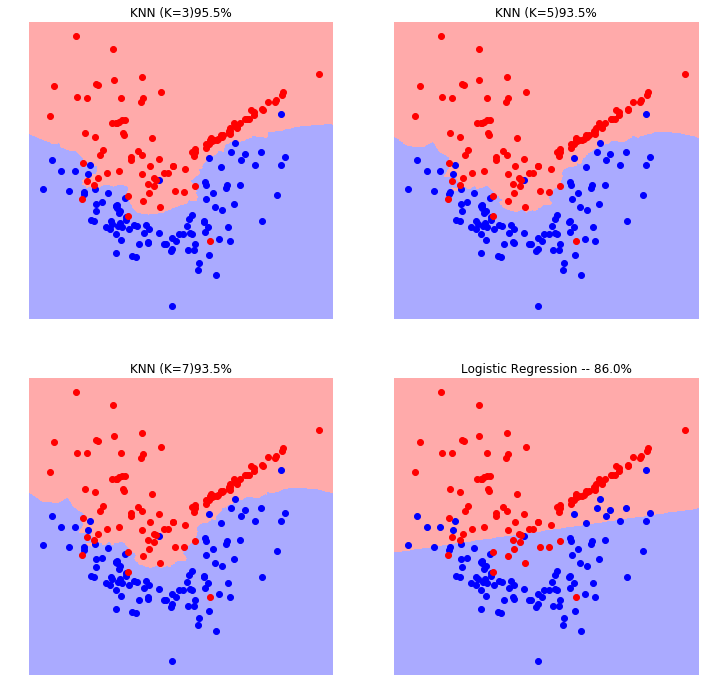

In [12]:
np.random.seed(874)
%run -i examples/example10.py

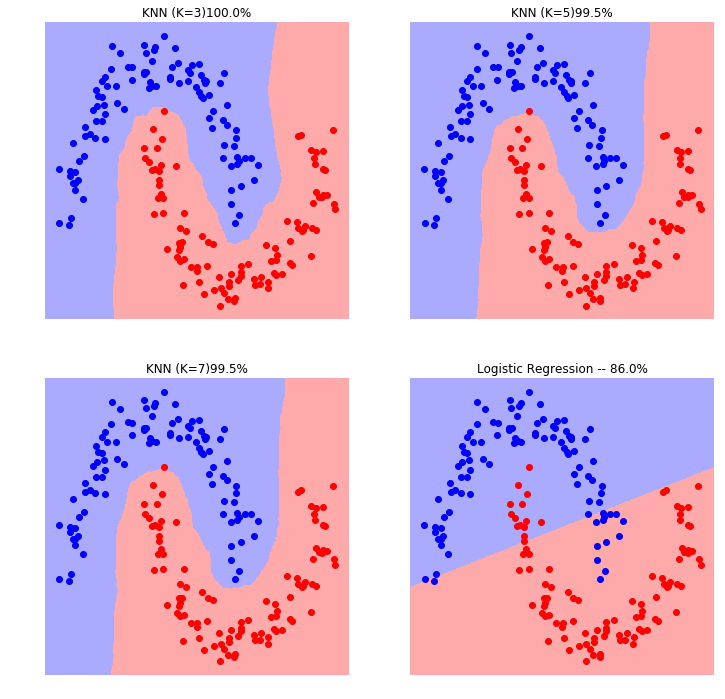

In [13]:
%run -i examples/example11.py

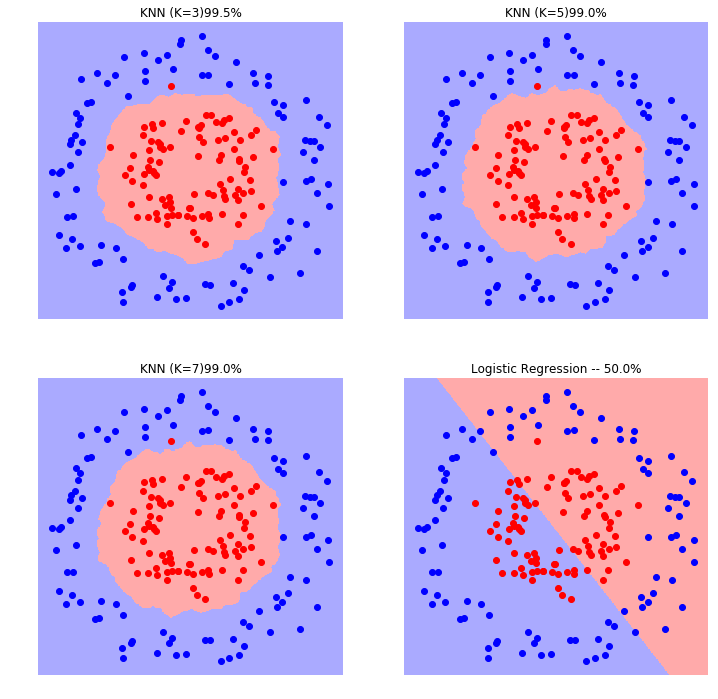

In [14]:
%run -i examples/example12.py

## Multiclass Classification with KNN

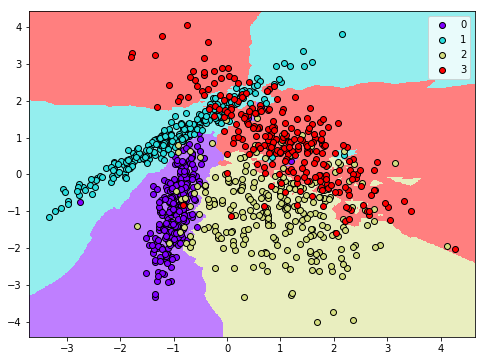

In [19]:
X, y = skds.make_classification(n_samples = 1000, n_classes = 4,
                                n_features=2, n_redundant=0, 
                                n_informative=2, n_clusters_per_class=1)

knn = KNeighborsClassifier(3)
knn.fit(X, y)

mlu.plot_regions(knn, X, y, 500)

## Applying KNN to the Iris Dataset

In [21]:
iris = pd.read_table(filepath_or_buffer='Datasets\iris.txt', sep='\t')
iris.head(n=10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.5,4.2,1.4,0.2,setosa
1,5.6,3.0,4.5,1.5,versicolor
2,7.2,3.6,6.1,2.5,virginica
3,4.8,3.0,1.4,0.3,setosa
4,5.5,2.4,3.8,1.1,versicolor
5,5.8,2.7,3.9,1.2,versicolor
6,6.0,3.4,4.5,1.6,versicolor
7,7.7,3.0,6.1,2.3,virginica
8,6.2,2.9,4.3,1.3,versicolor
9,4.9,3.1,1.5,0.2,setosa


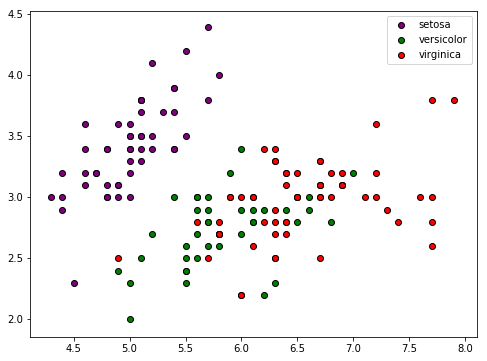

In [22]:
X = iris.iloc[:,:4]
y = iris.iloc[:,4]

plt.close()
plt.rcParams["figure.figsize"] = [8,6]
plt.scatter(X.loc[y == 'setosa','Sepal.Length'], X.loc[y == 'setosa','Sepal.Width'], 
            c='purple', label='setosa', edgecolors='k')
plt.scatter(X.loc[y == 'versicolor','Sepal.Length'], X.loc[y == 'versicolor','Sepal.Width'], 
            c='green', label='versicolor', edgecolors='k')
plt.scatter(X.loc[y == 'virginica','Sepal.Length'], X.loc[y == 'virginica','Sepal.Width'], 
            c='red', label='virginica', edgecolors='k')
plt.xlabel = 'Sepal Length'
plt.ylabel = 'Sepal Width'
plt.legend()
plt.show()


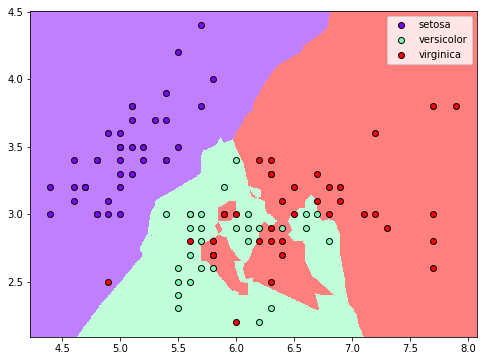

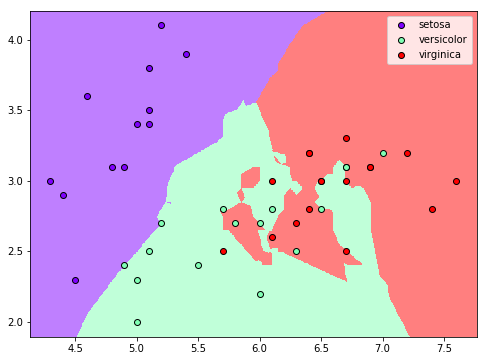

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

knn = KNeighborsClassifier(3)
knn.fit(X_train.iloc[:,:2], y_train)

mlu.plot_regions(knn, X_train.iloc[:,:2], y_train, 500)
mlu.plot_regions(knn, X_test.iloc[:,:2], y_test, 500)

In [24]:
print("Training Accuracy:", knn.score(X_train.iloc[:,:2],y_train))
print("Testing Accuracy:", knn.score(X_test.iloc[:,:2],y_test))

Training Accuracy: 0.895238095238
Testing Accuracy: 0.711111111111


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
pred_test = knn.predict(X_test.iloc[:,:2])

print(confusion_matrix(y_test, pred_test))

[[12  0  0]
 [ 1  9  8]
 [ 0  4 11]]


In [27]:
print(classification_report(y_test, pred_test))

             precision    recall  f1-score   support

     setosa       0.92      1.00      0.96        12
 versicolor       0.69      0.50      0.58        18
  virginica       0.58      0.73      0.65        15

avg / total       0.72      0.71      0.70        45



Now we will train the model using all four features. Our first priority is to select an appropriate value for K.

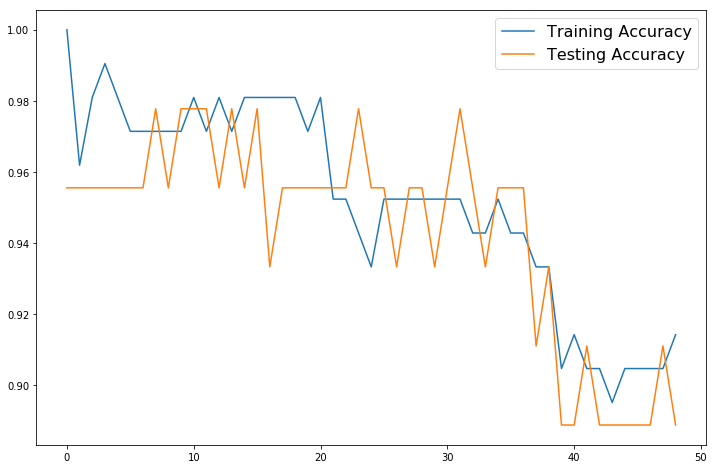

In [28]:
train_acc = []
test_acc = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))
    
plt.close()
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(train_acc, label="Training Accuracy")
plt.plot(test_acc, label="Testing Accuracy")
plt.legend(fontsize=16)
plt.show()

In [29]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)

print("Training Accuracy:", knn.score(X_train,y_train))
print("Testing Accuracy:", knn.score(X_test,y_test))

Training Accuracy: 0.971428571429
Testing Accuracy: 0.977777777778


In [30]:
pred_test = knn.predict(X_test)

print(confusion_matrix(y_test, pred_test))

[[12  0  0]
 [ 0 17  1]
 [ 0  0 15]]


In [31]:
print(classification_report(y_test, pred_test))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      0.94      0.97        18
  virginica       0.94      1.00      0.97        15

avg / total       0.98      0.98      0.98        45



## Pros and Cons of KNN 

**Pros**

* Easy to understand. 
* Flexible (Although, one must be careful about overfitting.)
* No time required to train. 
* Naturally adapts to multi-class classification.

**Cons**

* Making predictions is computationally intensive, and can be slow on a large dataset.
* Model performance can be diminished when there are many dimensions. (Curse of dimensionality)
* Requires a meaningful notion of distance in the feature space. 
* Generally requires features to be scaled/normalized. 

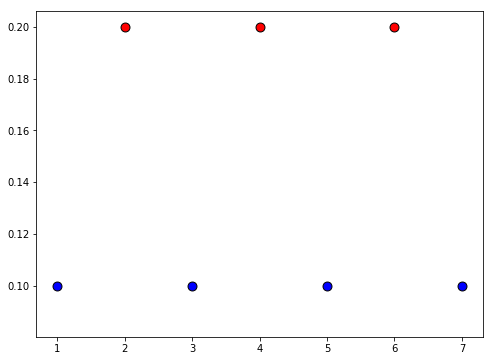

In [32]:
x1 = np.array([1, 2, 3, 4, 5, 6, 7])
x2 = np.array([0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1])
X = np.concatenate([x1.reshape(7,1), x2.reshape(7,1)], axis = 1)
y = np.array([0,1,0,1,0,1,0])

plt.close()
plt.rcParams["figure.figsize"] = [8,6]
plt.scatter(x1[y==0], x2[y==0], c='b', edgecolors='k', s=80)
plt.scatter(x1[y==1], x2[y==1], c='r', edgecolors='k', s=80)
plt.show()

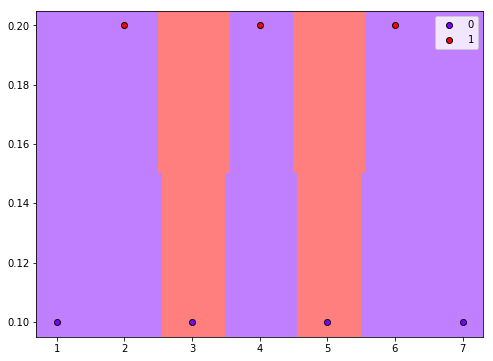

In [33]:
knn = KNeighborsClassifier(3)
knn.fit(X,y)
mlu.plot_regions(knn, X, y)

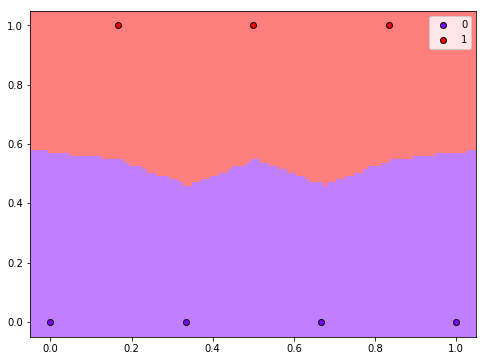

In [34]:
x1_rescaled = (x1 - np.min(x1)) / (np.max(x1) - np.min(x1))
x2_rescaled = (x2 - np.min(x2)) / (np.max(x2) - np.min(x2))
X_rescaled = np.concatenate([x1_rescaled.reshape(7,1), x2_rescaled.reshape(7,1)], axis = 1)

knn = KNeighborsClassifier(3)
knn.fit(X_rescaled,y)
mlu.plot_regions(knn, X_rescaled, y)